In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [30]:
# import dataset
xTrain = pd.read_csv("discrete/standard/xTrain_discrete.csv")
yTrain = pd.read_csv("discrete/standard/yTrain_discrete.csv")
xTest = pd.read_csv("discrete/standard/xTest_discrete.csv")
yTest = pd.read_csv("discrete/standard/yTest_discrete.csv")

In [42]:
## hyper parameter tuning manually

k_fold = KFold(n_splits=5, shuffle=True, random_state=334)

# for kernal
kernals = ["linear", "rbf", "poly", "sigmoid"]

for k in kernals:   
    acc_scores = []
    for train_index, validation_index in k_fold.split(xTrain):
        cur_model = SVC(kernel=k, C=1)
        cur_model.fit(xTrain.iloc[train_index], np.ravel(yTrain.iloc[train_index]))
        acc_scores.append(cur_model.score(xTrain.iloc[validation_index], np.ravel(yTrain.iloc[validation_index])))
    print("Kernal: ", k)
    print("Accuracy: ", np.mean(acc_scores))

Kernal:  linear
Accuracy:  0.7072036644279487
Kernal:  rbf
Accuracy:  0.6909199363732768
Kernal:  poly
Accuracy:  0.6702648167786027
Kernal:  sigmoid
Accuracy:  0.6387666431012136


Soft margin:  0.1
Accuracy:  0.7082906209496878
Soft margin:  1
Accuracy:  0.7072036644279487
Soft margin:  5
Accuracy:  0.7077471426888182
Soft margin:  10
Accuracy:  0.7088340992105573
Soft margin:  15
Accuracy:  0.7088340992105573
Soft margin:  20
Accuracy:  0.7088340992105573
Soft margin:  50
Accuracy:  0.7082906209496878
Soft margin:  100
Accuracy:  0.7077471426888182


<function matplotlib.pyplot.show(close=None, block=None)>

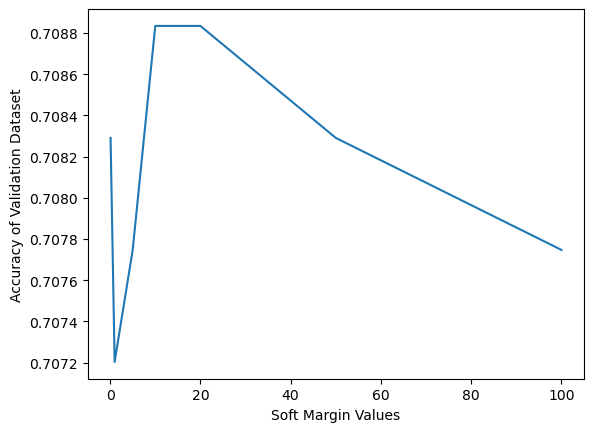

In [41]:
# for the soft margin
soft_margins = [0.1, 1, 5, 10, 15, 20, 50, 100]

avg_accuracies = []
for soft_margin in soft_margins:   
    acc_scores = []
    for train_index, validation_index in k_fold.split(xTrain):
        cur_model = SVC(kernel="linear", C=soft_margin)
        cur_model.fit(xTrain.iloc[train_index], np.ravel(yTrain.iloc[train_index]))
        acc_scores.append(cur_model.score(xTrain.iloc[validation_index], np.ravel(yTrain.iloc[validation_index])))
    avg_accuracy = np.mean(acc_scores)
    avg_accuracies.append(avg_accuracy)
    print("Soft margin: ", soft_margin)
    print("Accuracy: ", avg_accuracy)
    
plt.plot(soft_margins, avg_accuracies)
plt.xlabel("Soft Margin Values")
plt.ylabel("Accuracy of Validation Dataset")
plt.show


In [46]:
# train the support vector machine model with the optimal hyper parameters: kernal = "linear", soft margin = 15
clf = SVC(kernel="linear", C=15)
clf.fit(xTrain, np.ravel(yTrain))
# predict on test dataset
acc = clf.score(xTest, yTest)
print("Test accuracy with optimal hyper parameter: ", acc)

Test accuracy with optimal hyper parameter:  0.6872964169381107


In [47]:
# hyperparameter tuning with build in method
model = SVC()
param_grid = {
    'C': [1, 10, 100, 200],
    'kernel': ['linear', 'rbf', 'poly'],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(xTrain, np.ravel(yTrain))
best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
yHat = best_model.predict(xTest)

accuracy = accuracy_score(np.ravel(yTest), yHat)
print(accuracy)